# 첫 번째 과제

- tqdm 모듈

In [1]:
from tqdm import tqdm

- 상수 리스트 생성

In [2]:
BILATERAL_FILTER_SIZE = 7
BILATERAL_FILTER_SPACE_STD_LIST = [1, 4, 16]
BILATERAL_FILTER_RANGE_STD_LIST = [0.01, 0.05, 1.0]

- 함수 생성

In [3]:
from func import *


def bilateral_filter(image, diameter, sigma_r, sigma_s):
    radius = (diameter - 1) // 2
    height, width = image.shape
    output = np.zeros(image.shape)
    for i in tqdm(range(height)):
        for j in range(width):
            pixel_sum = 0
            weight_sum = 0
            for k in range(max(0, i - radius), min(height, i + radius + 1)):
                for l in range(max(0, j - radius), min(width, j + radius + 1)):
                    weight = calculate_weight(image, i, j, k, l, sigma_r, sigma_s)
                    weight_sum += weight
                    pixel_sum += weight * image[k, l]

            output[i, j] = pixel_sum / weight_sum

    return output

noisy_image = cv2.imread('../img/noisyblur_lenna.jpg', cv2.IMREAD_GRAYSCALE) / 255

- 실행

100%|████████████████████████████████████████████████████████████████████████████████| 256/256 [02:04<00:00,  2.05it/s]


σr: 0.01, σs: 1


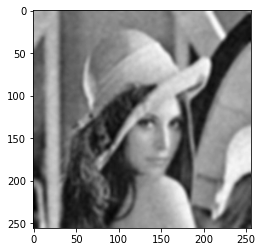

100%|████████████████████████████████████████████████████████████████████████████████| 256/256 [02:07<00:00,  2.01it/s]

σr: 0.01, σs: 4


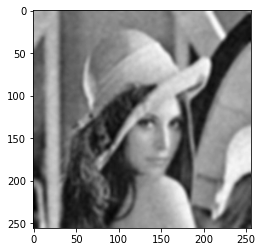

100%|████████████████████████████████████████████████████████████████████████████████| 256/256 [02:08<00:00,  1.98it/s]

σr: 0.01, σs: 16


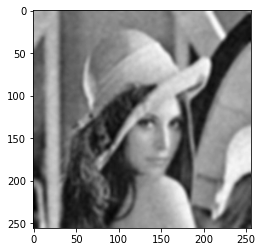

100%|████████████████████████████████████████████████████████████████████████████████| 256/256 [02:10<00:00,  1.96it/s]

σr: 0.05, σs: 1


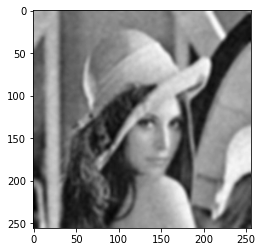

100%|████████████████████████████████████████████████████████████████████████████████| 256/256 [02:05<00:00,  2.04it/s]

σr: 0.05, σs: 4


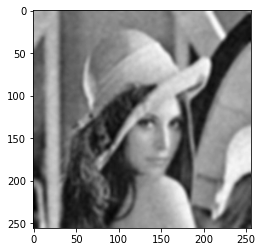

100%|████████████████████████████████████████████████████████████████████████████████| 256/256 [02:06<00:00,  2.02it/s]


σr: 0.05, σs: 16


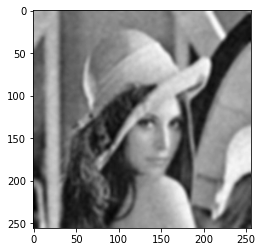

100%|████████████████████████████████████████████████████████████████████████████████| 256/256 [02:03<00:00,  2.07it/s]

σr: 1.0, σs: 1


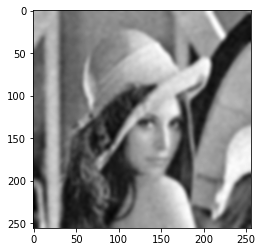

100%|████████████████████████████████████████████████████████████████████████████████| 256/256 [02:06<00:00,  2.02it/s]

σr: 1.0, σs: 4


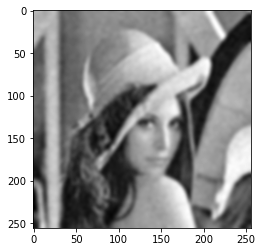

100%|████████████████████████████████████████████████████████████████████████████████| 256/256 [02:10<00:00,  1.96it/s]

σr: 1.0, σs: 16


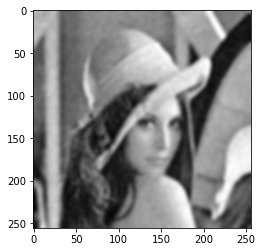

In [4]:
for RANGE in BILATERAL_FILTER_RANGE_STD_LIST:
    for SPACE in BILATERAL_FILTER_SPACE_STD_LIST:
        denoised_image = bilateral_filter(noisy_image, BILATERAL_FILTER_SIZE, SPACE, RANGE)##s
        plt.imshow(denoised_image, cmap='gray')
        print(f"σr: {RANGE}, σs: {SPACE}")
        plt.show()